**Sentiment Analysis of Traveloka App in Google Playstore**

**WebScrapping and Data Cleaning**

In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.4 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app, reviews
import pandas as pd
import datetime

In [ ]:
from google_play_scraper import reviews, Sort
app_id = 'com.traveloka.android'

def get_reviews(app_id, lang = 'id', count = 1000000, sort = Sort.NEWEST, filter_score_with = None, filter_device_with = None, continuation_token = None):
    try :
      result, continuation_token = reviews(
          app_id,
          lang = lang,
          country = 'id',
          sort = sort,
          count = count,
          filter_score_with = filter_score_with,
          filter_device_with = filter_device_with,
          continuation_token = continuation_token
      )
      return result, continuation_token
    except Exception as e:
      print(e)
      return None, None

reviews, continuation_token, = get_reviews(app_id)

if reviews is not None :
  print('jumlah ulasan :', len(reviews))
  if len(reviews)> 0 :
    print('contoh ulasan:')
    print(reviews[0])
else :
  print('tidak ada ulasan')




jumlah ulasan : 189909
contoh ulasan:
{'reviewId': '99773b4c-0aa8-4dda-97dd-b35ebca92d1f', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': '🌟🌟🌟🌟🌟', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '5.10.1', 'at': datetime.datetime(2024, 12, 31, 3, 35, 40), 'replyContent': 'Hello! Thank you very much for the positive review. If you have any additional feedback, please feel free to contact us through our Message Center, which can be accessed via the Traveloka App homepage. We would be more than happy to assist you. Stay tuned for more exciting updates and offers on Traveloka!', 'repliedAt': datetime.datetime(2024, 12, 31, 4, 5, 6), 'appVersion': '5.10.1'}


In [ ]:
import csv

def export_to_csv(reviews, filename='hasil_scraper_ulasan_app_traveloka.csv'):
    if reviews:
        # Define the fieldnames for the CSV file
        fieldnames = ['reviewId', 'userName', 'Rating', 'Review Text', 'Date']
        try:
            with open(filename, mode='w', newline='', encoding='utf-8') as csv_file:
                writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
                writer.writeheader()  # Fix: Add parentheses to call the method

                for review in reviews:  # Fix: Use singular 'review' for iteration
                    writer.writerow({
                        'reviewId': review.get('reviewId', ''),  # Use .get() to handle missing keys
                        'userName': review.get('userName', ''),
                        'Rating': review.get('score', ''),
                        'Review Text': review.get('content', ''),  # Fix: Adjust key name for review text
                        'Date': review.get('at', '')  # Fix: Correct key name for date
                    })
            print(f"Data berhasil diekspor ke '{filename}'")  # Fix: Corrected the variable name
        except Exception as e:
            print(f"Terjadi kesalahan saat menulis ke file: {e}")
    else:
        print('Tidak ada data untuk diekspor')

export_to_csv(reviews)


Data berhasil diekspor ke 'hasil_scraper_ulasan_app_traveloka.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
# Set display option to show the full text in the DataFrame
pd.set_option('display.max_colwidth', None)

# Now print the 'Review Text' column to see all the text


In [ ]:
df = pd.read_csv('hasil_scraper_ulasan_app_traveloka.csv')

df.head()

,reviewId,userName,Rating,Review Text,Date
0,99773b4c-0aa8-4dda-97dd-b35ebca92d1f,Pengguna Google,5,🌟🌟🌟🌟🌟,2024-12-31 03:35:40
1,14b946a2-5926-4114-8add-b238da675e73,Pengguna Google,5,Bepergian jadi mudah,2024-12-31 01:51:27
2,a12f5b72-f6fe-4fa6-a812-c700c15011b2,Pengguna Google,1,Sistem pengajuan klaim delay nya ga selesai selesai. Hapus aja sistem pembelian klaim asuransi delay. Kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu. Percuma.,2024-12-31 01:38:16
3,04899c96-8e22-4cc8-b706-d041f86d2351,Pengguna Google,5,ok,2024-12-31 00:47:12
4,5a871703-68b2-4d0c-a074-762440da3b80,Pengguna Google,4,baik,2024-12-30 19:20:06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189909 entries, 0 to 189908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   reviewId     189909 non-null  object
 1   userName     189909 non-null  object
 2   Rating       189909 non-null  int64 
 3   Review Text  189851 non-null  object
 4   Date         189909 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.2+ MB


In [ ]:
df.describe()

,Rating
count,189909.000000
mean,4.302835
std,1.284803
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


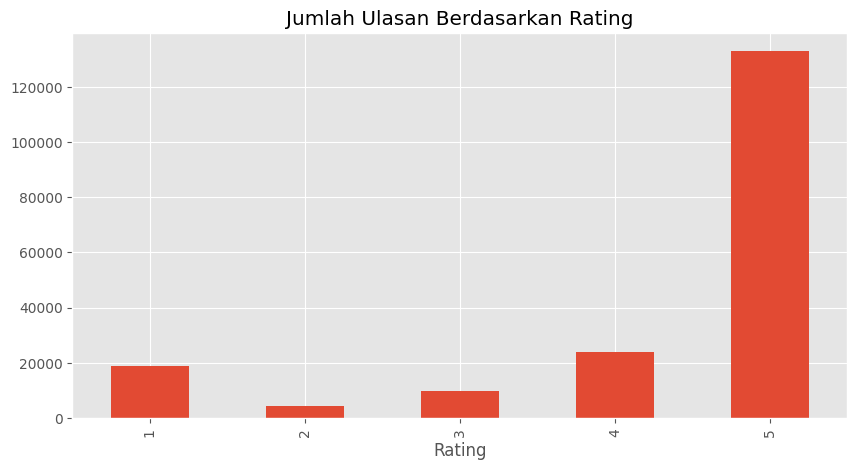

In [ ]:
ax = df['Rating'].value_counts().sort_index().plot(kind = 'bar', title = 'Jumlah Ulasan Berdasarkan Rating', figsize= (10,5))

ax.x_label = 'Rating'
ax.y_label = 'Jumlah Ulasan'
plt.show()

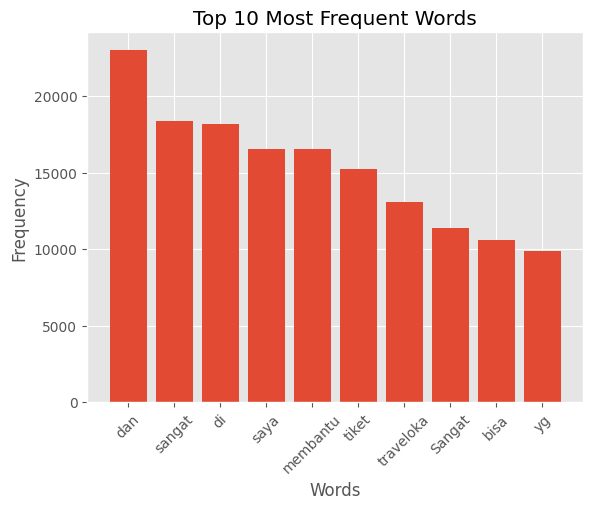

In [ ]:
from collections import Counter

# Combine all reviews into a single string
text = " ".join(df['Review Text'].fillna("").astype(str))

# Tokenize and count word frequencies
tokens = text.split()
word_counts = Counter(tokens)

# Get top 10 most frequent words
top_word = word_counts.most_common(10)
word, count = zip(*top_word)

# Plot the results
import matplotlib.pyplot as plt

plt.bar(word, count)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
#remove URL
def remove_URL(tweet) :
  if tweet is not None and isinstance(tweet, str) :
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)
  else :
    return tweet

def remove_html(tweet):
    if tweet and isinstance(tweet, str):  # Ensure 'tweet' is a non-empty string
        # Check if the tweet contains HTML tags
        if re.search(r'<.*?>', tweet):
            # Remove HTML tags
            tweet = re.sub(r'<.*?>', '', tweet)
        return tweet
    return ""

  #remove mention
def remove_mention(tweet) :
  if tweet is not None :
    mention = re.compile(r'@\S+')
    return mention.sub(r'', tweet)
  else :
    return tweet

def remove_symbol(tweet) :
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

#remove number
def remove_number(tweet) :
  if tweet is not None and isinstance(tweet, str) :
    tweet = re.sub(r'\d', '', tweet)
    return tweet


In [ ]:
df['cleaning'] = df['Review Text'].apply(remove_URL)
df['cleaning'] = df['cleaning'].apply(remove_html)
df['cleaning'] = df['cleaning'].apply(remove_mention)
df['cleaning'] = df['cleaning'].apply(remove_symbol)

In [ ]:
import re

# Define each cleaning function

def remove_URL(tweet):
    if isinstance(tweet, str):  # Ensure tweet is a string
        return re.sub(r'http\S+|www\S+', '', tweet)  # Remove URLs
    return tweet

def remove_html(tweet):
    if isinstance(tweet, str):  # Ensure tweet is a string
        return re.sub(r'<.*?>', '', tweet)  # Remove HTML tags
    return tweet

def remove_mention(tweet):
    if isinstance(tweet, str):  # Ensure tweet is a string
        return re.sub(r'@\w+', '', tweet)  # Remove mentions (e.g., @username)
    return tweet

def remove_symbol(tweet):
    if isinstance(tweet, str):  # Ensure tweet is a string
        return re.sub(r'[^a-zA-Z0-9\s]', '', tweet)  # Remove non-alphanumeric characters
    return tweet

# Apply the cleaning functions to the 'Review Text' column

df['cleaning'] = df['Review Text'].apply(lambda x : remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x : remove_mention(x))
df['cleaning'] = df['cleaning'].apply(lambda x : remove_symbol(x))

# Inspect the result
df.head()


,reviewId,userName,Rating,Review Text,Date,Year,Month,Day,cleaning
0,99773b4c-0aa8-4dda-97dd-b35ebca92d1f,Pengguna Google,5,🌟🌟🌟🌟🌟,2024-12-31 03:35:40,2024,12,31,
1,14b946a2-5926-4114-8add-b238da675e73,Pengguna Google,5,Bepergian jadi mudah,2024-12-31 01:51:27,2024,12,31,Bepergian jadi mudah
2,a12f5b72-f6fe-4fa6-a812-c700c15011b2,Pengguna Google,1,Sistem pengajuan klaim delay nya ga selesai selesai. Hapus aja sistem pembelian klaim asuransi delay. Kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu. Percuma.,2024-12-31 01:38:16,2024,12,31,Sistem pengajuan klaim delay nya ga selesai selesai Hapus aja sistem pembelian klaim asuransi delay Kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu Percuma
3,04899c96-8e22-4cc8-b706-d041f86d2351,Pengguna Google,5,ok,2024-12-31 00:47:12,2024,12,31,ok
4,5a871703-68b2-4d0c-a074-762440da3b80,Pengguna Google,4,baik,2024-12-30 19:20:06,2024,12,30,baik


In [ ]:
def case_folding(text) :
  if isinstance(text, str) :
    return text.lower()
  return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head()

,reviewId,userName,Rating,Review Text,Date,Year,Month,Day,cleaning,case_folding
0,99773b4c-0aa8-4dda-97dd-b35ebca92d1f,Pengguna Google,5,🌟🌟🌟🌟🌟,2024-12-31 03:35:40,2024,12,31,,
1,14b946a2-5926-4114-8add-b238da675e73,Pengguna Google,5,Bepergian jadi mudah,2024-12-31 01:51:27,2024,12,31,Bepergian jadi mudah,bepergian jadi mudah
2,a12f5b72-f6fe-4fa6-a812-c700c15011b2,Pengguna Google,1,Sistem pengajuan klaim delay nya ga selesai selesai. Hapus aja sistem pembelian klaim asuransi delay. Kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu. Percuma.,2024-12-31 01:38:16,2024,12,31,Sistem pengajuan klaim delay nya ga selesai selesai Hapus aja sistem pembelian klaim asuransi delay Kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu Percuma,sistem pengajuan klaim delay nya ga selesai selesai hapus aja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu percuma
3,04899c96-8e22-4cc8-b706-d041f86d2351,Pengguna Google,5,ok,2024-12-31 00:47:12,2024,12,31,ok,ok
4,5a871703-68b2-4d0c-a074-762440da3b80,Pengguna Google,4,baik,2024-12-30 19:20:06,2024,12,30,baik,baik


In [ ]:
data = df.copy()

In [ ]:
import pandas as pd

# Step 1: Read the Excel file containing the mapping of standard and non-standard words
kamus_data = pd.read_excel('kamuskatabaku.xlsx')

# Step 2: Create a dictionary for word normalization
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

# Step 3: Define the function to replace taboo words (non-standard) with standard words
def replace_taboo_words(text, taboo_dict):
    if isinstance(text, str):  # Check if the input is a string
        words = text.split()  # Split the text into words
        normalized_words = [taboo_dict.get(word, word) for word in words]  # Replace non-standard words
        non_standard_words = [word for word in words if word in taboo_dict]  # Identify non-standard words
        return " ".join(normalized_words), " ".join(words), " ".join(non_standard_words)
    else:
        return text, text, ""  # Handle non-string inputs gracefully

# Assuming `data` is the DataFrame containing the text to be normalized
# Step 4: Apply the function to normalize text and extract original and non-standard words
data[['normalisasi', 'kata_baku', 'kata_tidak_baku']] = data['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku))
)

# Inspect the result
data.head()


,reviewId,userName,Rating,Review Text,Date,Year,Month,Day,cleaning,case_folding,normalisasi,kata_baku,kata_tidak_baku
0,99773b4c-0aa8-4dda-97dd-b35ebca92d1f,Pengguna Google,5,🌟🌟🌟🌟🌟,2024-12-31 03:35:40,2024,12,31,,,,,
1,14b946a2-5926-4114-8add-b238da675e73,Pengguna Google,5,Bepergian jadi mudah,2024-12-31 01:51:27,2024,12,31,Bepergian jadi mudah,bepergian jadi mudah,bepergian jadi mudah,bepergian jadi mudah,
2,a12f5b72-f6fe-4fa6-a812-c700c15011b2,Pengguna Google,1,Sistem pengajuan klaim delay nya ga selesai selesai. Hapus aja sistem pembelian klaim asuransi delay. Kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu. Percuma.,2024-12-31 01:38:16,2024,12,31,Sistem pengajuan klaim delay nya ga selesai selesai Hapus aja sistem pembelian klaim asuransi delay Kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu Percuma,sistem pengajuan klaim delay nya ga selesai selesai hapus aja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu percuma,sistem pengajuan klaim delay ya tidak selesai selesai hapus saja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses ya tidak kelar kelar sampai seminggu percuma,sistem pengajuan klaim delay nya ga selesai selesai hapus aja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu percuma,nya ga aja nya ga sampe
3,04899c96-8e22-4cc8-b706-d041f86d2351,Pengguna Google,5,ok,2024-12-31 00:47:12,2024,12,31,ok,ok,ok,ok,
4,5a871703-68b2-4d0c-a074-762440da3b80,Pengguna Google,4,baik,2024-12-30 19:20:06,2024,12,30,baik,baik,baik,baik,


In [ ]:
def tokenize(text):
    # Ensure the input is a string, or convert it to an empty string
    if not isinstance(text, str):
        return []
    tokens = text.split()
    return tokens

# Replace NaN or non-string values with empty strings
data['normalisasi'] = data['normalisasi'].fillna('')

# Apply the tokenize function
data['tokenize'] = data['normalisasi'].apply(tokenize)

# Display the updated DataFrame
data.head()


,reviewId,userName,Rating,Review Text,Date,Year,Month,Day,cleaning,case_folding,normalisasi,kata_baku,kata_tidak_baku,tokenize
0,99773b4c-0aa8-4dda-97dd-b35ebca92d1f,Pengguna Google,5,🌟🌟🌟🌟🌟,2024-12-31 03:35:40,2024,12,31,,,,,,[]
1,14b946a2-5926-4114-8add-b238da675e73,Pengguna Google,5,Bepergian jadi mudah,2024-12-31 01:51:27,2024,12,31,Bepergian jadi mudah,bepergian jadi mudah,bepergian jadi mudah,bepergian jadi mudah,,"[bepergian, jadi, mudah]"
2,a12f5b72-f6fe-4fa6-a812-c700c15011b2,Pengguna Google,1,Sistem pengajuan klaim delay nya ga selesai selesai. Hapus aja sistem pembelian klaim asuransi delay. Kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu. Percuma.,2024-12-31 01:38:16,2024,12,31,Sistem pengajuan klaim delay nya ga selesai selesai Hapus aja sistem pembelian klaim asuransi delay Kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu Percuma,sistem pengajuan klaim delay nya ga selesai selesai hapus aja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu percuma,sistem pengajuan klaim delay ya tidak selesai selesai hapus saja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses ya tidak kelar kelar sampai seminggu percuma,sistem pengajuan klaim delay nya ga selesai selesai hapus aja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu percuma,nya ga aja nya ga sampe,"[sistem, pengajuan, klaim, delay, ya, tidak, selesai, selesai, hapus, saja, sistem, pembelian, klaim, asuransi, delay, kami, sudah, beli, giliran, delay, proses, ya, tidak, kelar, kelar, sampai, seminggu, percuma]"
3,04899c96-8e22-4cc8-b706-d041f86d2351,Pengguna Google,5,ok,2024-12-31 00:47:12,2024,12,31,ok,ok,ok,ok,,[ok]
4,5a871703-68b2-4d0c-a074-762440da3b80,Pengguna Google,4,baik,2024-12-30 19:20:06,2024,12,30,baik,baik,baik,baik,,[baik]


In [ ]:
from nltk.corpus import stopwords
nltk.download ('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text) :
  return [word for word in text if word not in stop_words]

data['remove_stopwords'] = data['tokenize'].apply(lambda x : remove_stopwords(x))
data.head()

,reviewId,userName,Rating,Review Text,Date,Year,Month,Day,cleaning,case_folding,normalisasi,kata_baku,kata_tidak_baku,tokenize,remove_stopwords
0,99773b4c-0aa8-4dda-97dd-b35ebca92d1f,Pengguna Google,5,🌟🌟🌟🌟🌟,2024-12-31 03:35:40,2024,12,31,,,,,,[],[]
1,14b946a2-5926-4114-8add-b238da675e73,Pengguna Google,5,Bepergian jadi mudah,2024-12-31 01:51:27,2024,12,31,Bepergian jadi mudah,bepergian jadi mudah,bepergian jadi mudah,bepergian jadi mudah,,"[bepergian, jadi, mudah]","[bepergian, mudah]"
2,a12f5b72-f6fe-4fa6-a812-c700c15011b2,Pengguna Google,1,Sistem pengajuan klaim delay nya ga selesai selesai. Hapus aja sistem pembelian klaim asuransi delay. Kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu. Percuma.,2024-12-31 01:38:16,2024,12,31,Sistem pengajuan klaim delay nya ga selesai selesai Hapus aja sistem pembelian klaim asuransi delay Kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu Percuma,sistem pengajuan klaim delay nya ga selesai selesai hapus aja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu percuma,sistem pengajuan klaim delay ya tidak selesai selesai hapus saja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses ya tidak kelar kelar sampai seminggu percuma,sistem pengajuan klaim delay nya ga selesai selesai hapus aja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu percuma,nya ga aja nya ga sampe,"[sistem, pengajuan, klaim, delay, ya, tidak, selesai, selesai, hapus, saja, sistem, pembelian, klaim, asuransi, delay, kami, sudah, beli, giliran, delay, proses, ya, tidak, kelar, kelar, sampai, seminggu, percuma]","[sistem, pengajuan, klaim, delay, ya, selesai, selesai, hapus, sistem, pembelian, klaim, asuransi, delay, beli, giliran, delay, proses, ya, kelar, kelar, seminggu]"
3,04899c96-8e22-4cc8-b706-d041f86d2351,Pengguna Google,5,ok,2024-12-31 00:47:12,2024,12,31,ok,ok,ok,ok,,[ok],[ok]
4,5a871703-68b2-4d0c-a074-762440da3b80,Pengguna Google,4,baik,2024-12-30 19:20:06,2024,12,30,baik,baik,baik,baik,,[baik],[]


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 11.8 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

data['stemming'] = data['remove_stopwords'].apply(lambda x : stem_text(x))
data.head()

,reviewId,userName,Rating,Review Text,Date,Year,Month,Day,cleaning,case_folding,normalisasi,kata_baku,kata_tidak_baku,tokenize,remove_stopwords,stemming
0,99773b4c-0aa8-4dda-97dd-b35ebca92d1f,Pengguna Google,5,🌟🌟🌟🌟🌟,2024-12-31 03:35:40,2024,12,31,,,,,,[],[],[]
1,14b946a2-5926-4114-8add-b238da675e73,Pengguna Google,5,Bepergian jadi mudah,2024-12-31 01:51:27,2024,12,31,Bepergian jadi mudah,bepergian jadi mudah,bepergian jadi mudah,bepergian jadi mudah,,"[bepergian, jadi, mudah]","[bepergian, mudah]","[pergi, mudah]"
2,a12f5b72-f6fe-4fa6-a812-c700c15011b2,Pengguna Google,1,Sistem pengajuan klaim delay nya ga selesai selesai. Hapus aja sistem pembelian klaim asuransi delay. Kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu. Percuma.,2024-12-31 01:38:16,2024,12,31,Sistem pengajuan klaim delay nya ga selesai selesai Hapus aja sistem pembelian klaim asuransi delay Kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu Percuma,sistem pengajuan klaim delay nya ga selesai selesai hapus aja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu percuma,sistem pengajuan klaim delay ya tidak selesai selesai hapus saja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses ya tidak kelar kelar sampai seminggu percuma,sistem pengajuan klaim delay nya ga selesai selesai hapus aja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu percuma,nya ga aja nya ga sampe,"[sistem, pengajuan, klaim, delay, ya, tidak, selesai, selesai, hapus, saja, sistem, pembelian, klaim, asuransi, delay, kami, sudah, beli, giliran, delay, proses, ya, tidak, kelar, kelar, sampai, seminggu, percuma]","[sistem, pengajuan, klaim, delay, ya, selesai, selesai, hapus, sistem, pembelian, klaim, asuransi, delay, beli, giliran, delay, proses, ya, kelar, kelar, seminggu]","[sistem, aju, klaim, delay, ya, selesai, selesai, hapus, sistem, beli, klaim, asuransi, delay, beli, gilir, delay, proses, ya, kelar, kelar, minggu]"
3,04899c96-8e22-4cc8-b706-d041f86d2351,Pengguna Google,5,ok,2024-12-31 00:47:12,2024,12,31,ok,ok,ok,ok,,[ok],[ok],[ok]
4,5a871703-68b2-4d0c-a074-762440da3b80,Pengguna Google,4,baik,2024-12-30 19:20:06,2024,12,30,baik,baik,baik,baik,,[baik],[],[]


In [ ]:
data.to_csv('hasil_preprocessing_ulasan_app_traveloka.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv('hasil_preprocessing_ulasan_app_traveloka.csv')

In [ ]:
df.head()

,reviewId,userName,Rating,Review Text,Date,Year,Month,Day,cleaning,case_folding,normalisasi,kata_baku,kata_tidak_baku,tokenize,remove_stopwords,stemming
0,99773b4c-0aa8-4dda-97dd-b35ebca92d1f,Pengguna Google,5,🌟🌟🌟🌟🌟,2024-12-31 03:35:40,2024,12,31,NaN,NaN,NaN,NaN,NaN,[],[],[]
1,14b946a2-5926-4114-8add-b238da675e73,Pengguna Google,5,Bepergian jadi mudah,2024-12-31 01:51:27,2024,12,31,Bepergian jadi mudah,bepergian jadi mudah,bepergian jadi mudah,bepergian jadi mudah,NaN,"['bepergian', 'jadi', 'mudah']","['bepergian', 'mudah']","['pergi', 'mudah']"
2,a12f5b72-f6fe-4fa6-a812-c700c15011b2,Pengguna Google,1,Sistem pengajuan klaim delay nya ga selesai selesai. Hapus aja sistem pembelian klaim asuransi delay. Kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu. Percuma.,2024-12-31 01:38:16,2024,12,31,Sistem pengajuan klaim delay nya ga selesai selesai Hapus aja sistem pembelian klaim asuransi delay Kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu Percuma,sistem pengajuan klaim delay nya ga selesai selesai hapus aja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu percuma,sistem pengajuan klaim delay ya tidak selesai selesai hapus saja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses ya tidak kelar kelar sampai seminggu percuma,sistem pengajuan klaim delay nya ga selesai selesai hapus aja sistem pembelian klaim asuransi delay kami sudah beli giliran delay proses nya ga kelar kelar sampe seminggu percuma,nya ga aja nya ga sampe,"['sistem', 'pengajuan', 'klaim', 'delay', 'ya', 'tidak', 'selesai', 'selesai', 'hapus', 'saja', 'sistem', 'pembelian', 'klaim', 'asuransi', 'delay', 'kami', 'sudah', 'beli', 'giliran', 'delay', 'proses', 'ya', 'tidak', 'kelar', 'kelar', 'sampai', 'seminggu', 'percuma']","['sistem', 'pengajuan', 'klaim', 'delay', 'ya', 'selesai', 'selesai', 'hapus', 'sistem', 'pembelian', 'klaim', 'asuransi', 'delay', 'beli', 'giliran', 'delay', 'proses', 'ya', 'kelar', 'kelar', 'seminggu']","['sistem', 'aju', 'klaim', 'delay', 'ya', 'selesai', 'selesai', 'hapus', 'sistem', 'beli', 'klaim', 'asuransi', 'delay', 'beli', 'gilir', 'delay', 'proses', 'ya', 'kelar', 'kelar', 'minggu']"
3,04899c96-8e22-4cc8-b706-d041f86d2351,Pengguna Google,5,ok,2024-12-31 00:47:12,2024,12,31,ok,ok,ok,ok,NaN,['ok'],['ok'],['ok']
4,5a871703-68b2-4d0c-a074-762440da3b80,Pengguna Google,4,baik,2024-12-30 19:20:06,2024,12,30,baik,baik,baik,baik,NaN,['baik'],[],[]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189909 entries, 0 to 189908
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   reviewId          189909 non-null  object
 1   userName          189909 non-null  object
 2   Rating            189909 non-null  int64 
 3   Review Text       189851 non-null  object
 4   Date              189909 non-null  object
 5   Year              189909 non-null  int64 
 6   Month             189909 non-null  int64 
 7   Day               189909 non-null  int64 
 8   cleaning          187363 non-null  object
 9   case_folding      187363 non-null  object
 10  normalisasi       187324 non-null  object
 11  kata_baku         187324 non-null  object
 12  kata_tidak_baku   52636 non-null   object
 13  tokenize          189909 non-null  object
 14  remove_stopwords  189909 non-null  object
 15  stemming          189909 non-null  object
dtypes: int64(4), object(12)
memory usage: 

In [ ]:
df.drop(['kata_tidak_baku','kata_baku'], inplace = True, axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189909 entries, 0 to 189908
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   reviewId          189909 non-null  object
 1   userName          189909 non-null  object
 2   Rating            189909 non-null  int64 
 3   Review Text       189851 non-null  object
 4   Date              189909 non-null  object
 5   Year              189909 non-null  int64 
 6   Month             189909 non-null  int64 
 7   Day               189909 non-null  int64 
 8   cleaning          187363 non-null  object
 9   case_folding      187363 non-null  object
 10  normalisasi       187324 non-null  object
 11  tokenize          189909 non-null  object
 12  remove_stopwords  189909 non-null  object
 13  stemming          189909 non-null  object
dtypes: int64(4), object(10)
memory usage: 20.3+ MB


In [ ]:
df.dropna(inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187324 entries, 1 to 189908
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   reviewId          187324 non-null  object
 1   userName          187324 non-null  object
 2   Rating            187324 non-null  int64 
 3   Review Text       187324 non-null  object
 4   Date              187324 non-null  object
 5   Year              187324 non-null  int64 
 6   Month             187324 non-null  int64 
 7   Day               187324 non-null  int64 
 8   cleaning          187324 non-null  object
 9   case_folding      187324 non-null  object
 10  normalisasi       187324 non-null  object
 11  tokenize          187324 non-null  object
 12  remove_stopwords  187324 non-null  object
 13  stemming          187324 non-null  object
dtypes: int64(4), object(10)
memory usage: 21.4+ MB


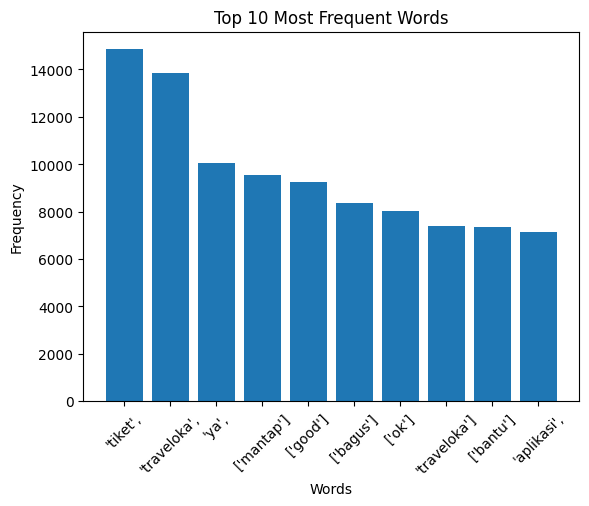

In [ ]:
from collections import Counter

# Combine all reviews into a single string
text = " ".join(df['stemming'].fillna("").astype(str))

# Tokenize and count word frequencies
tokens = text.split()
word_counts = Counter(tokens)

# Get top 10 most frequent words
top_word = word_counts.most_common(10)
word, count = zip(*top_word)

# Plot the results
import matplotlib.pyplot as plt

plt.bar(word, count)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import nltk
import pandas as pd
from nltk.corpus import opinion_lexicon
import string

# Download opinion lexicon if not already available
nltk.download('opinion_lexicon')

# Load positive and negative lexicons from NLTK
kata_positives = set(opinion_lexicon.positive())
kata_negatives = set(opinion_lexicon.negative())

# Load custom lexicons from CSV files (ensure no header)
kata_positive = pd.read_csv('Kamus - Positive.csv', header=None)
kata_negative = pd.read_csv('Kamus Negative.csv', header=None)

# Combine the custom lexicons with NLTK lexicons
positive_words = kata_positives.union(set(kata_positive[0].str.lower()))
negative_words = kata_negatives.union(set(kata_negative[0].str.lower()))

# Sentiment classification function with improved tokenization
def classify_sentiment(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    tokens = text.split()  # Tokenize by splitting

    # Debug: Print matched positive and negative words
    matched_positive = [word for word in tokens if word in positive_words]
    matched_negative = [word for word in tokens if word in negative_words]

    positive_count = len(matched_positive)
    negative_count = len(matched_negative)

    # Debug: Print counts
    print(f"Tokens: {tokens}")
    print(f"Matched Positive: {matched_positive}")
    print(f"Matched Negative: {matched_negative}")

    # Classify sentiment
    if positive_count > negative_count:
        return 'Positive'
    elif negative_count > positive_count:
        return 'Negative'
    else:
        return 'Neutral'



[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [ ]:
df['Sentiment'] = df['stemming'].apply(lambda x : classify_sentiment (x))

Streaming output truncated to the last 5000 lines.
Matched Positive: ['inovatif', 'mudah', 'mudah', 'hemat']
Matched Negative: ['hemat']
Tokens: ['traveloka', 'bantu', 'rencana', 'jalan', 'sayatetaplah', 'konsisten', 'masyarakat', 'suka']
Matched Positive: ['konsisten']
Matched Negative: []
Tokens: ['bantu', 'banget', 'beli', 'tiket', 'butuh', 'tinggal', 'buka', 'aplikasi', 'ya', 'jamin', 'ribet', 'top', 'deh']
Matched Positive: ['top']
Matched Negative: ['ribet']
Tokens: ['murah']
Matched Positive: ['murah']
Matched Negative: ['murah']
Tokens: ['terima', 'kasih', 'travelokasangat', 'bantu', 'info']
Matched Positive: ['terima']
Matched Negative: []
Tokens: ['bantu']
Matched Positive: []
Matched Negative: []
Tokens: ['maju', 'travelokakami', 'butuh']
Matched Positive: ['maju']
Matched Negative: []
Tokens: ['bantu']
Matched Positive: []
Matched Negative: []
Tokens: ['mantap']
Matched Positive: []
Matched Negative: []
Tokens: ['mudah', 'cari', 'ticket', 'terbang']
Matched Positive: ['muda

### **1. Sentiment Breakdown**



1.   Insight : How do customers feel about the product or service overall?
2.   Why it matters: Understanding the general sentiment allows us to assess the effectiveness of current marketing campaigns, identify strengths and weaknesses, and track sentiment over time.



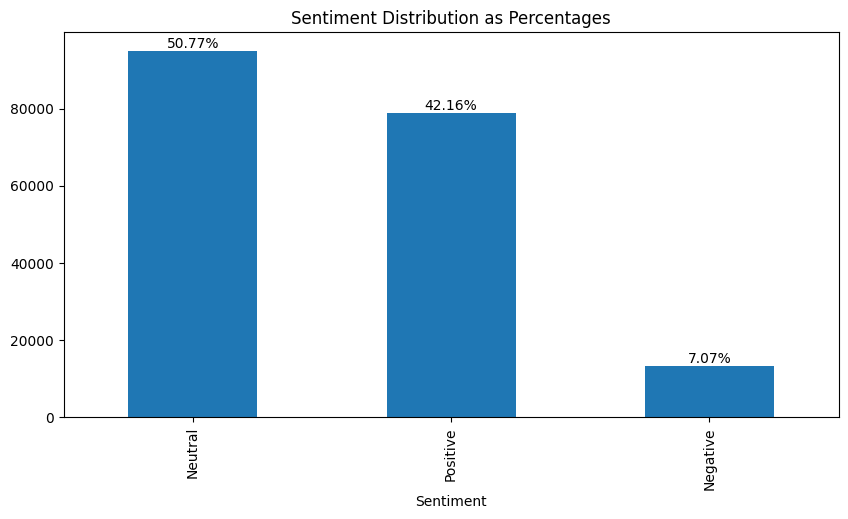

In [ ]:
import matplotlib.pyplot as plt

# Calculate sentiment counts and percentages
sentiment_counts = df['Sentiment'].value_counts()
total_reviews = sentiment_counts.sum()
percentages = (sentiment_counts / total_reviews) * 100

# Create the bar plot
ax = sentiment_counts.plot(kind='bar', title='Sentiment Distribution as Percentages', figsize=(10, 5))

# Add percentages on top of each bar
for bar in ax.patches:
    percentage = (bar.get_height() / total_reviews) * 100  # Calculate the percentage
    ax.annotate(
        f"{percentage:.2f}%",  # Format the percentage with two decimal places
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position (center of bar, height of bar)
        ha='center',  # Center alignment
        va='bottom',  # Place text slightly above the bar
        fontsize=10   # Font size of the text
    )

# Show the plot
plt.show()


Based on an analysis of 185,000 reviews from the Google Play Store, the overall sentiment towards the product is predominantly neutral, comprising 50.77% of the reviews. Positive sentiment follows at 42.16%, while negative sentiment accounts for 7.07%. This distribution highlights that while a significant portion of users express neutral feelings, a substantial proportion also share positive feedback, with a relatively small percentage indicating dissatisfaction.

# **Key Themes in Positive Reviews**



1.   Insight: What are customers praising? What features or services do they like most?
2.   Why it matters: This insight helps us understand what differentiates us from competitors, so we can use these strengths to attract more customers in future campaigns.



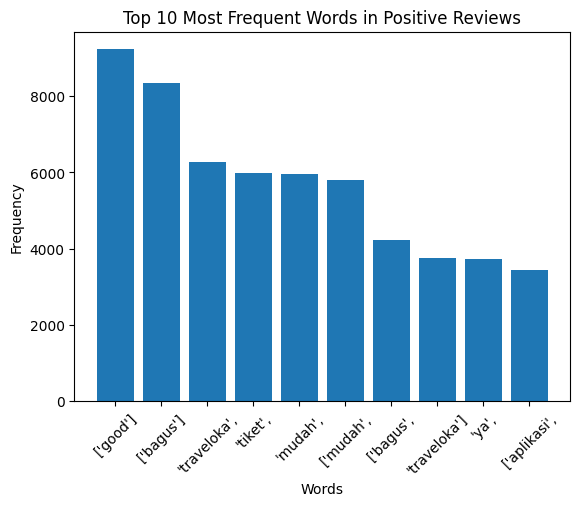

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Combine all negative reviews into a single string
text = " ".join(df[df['Sentiment'] == 'Positive']['stemming'].fillna("").astype(str))

# Tokenize and count word frequencies
tokens = text.split()
word_counts = Counter(tokens)

# Get top 10 most frequent words
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

# Plot the results
plt.bar(word, count)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Positive Reviews')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df[(df['Sentiment'] == 'Positive') & (df['Review Text'].str.contains('tiket', case=False))]['Review Text']

,Review Text
39,sangat bagus dan sangat membantu buat pesen tiket dann dll
90,Sangat menyesali pesan fi traveloka!!! Uang refund masuk traveloka point tidak bisa di uang kan pdhl bukan duit cashback duit yg di refund oleh maskapai di suruh untuk memesan tiket yang lain cukup untuk terakhir kalinya kecuali saya mau cairkan duit cashback😭😭😭😭 padahal sangat butuh uang itu
97,beli tiket lebih mudah
114,"traveloka payah, cuma reschedule aja harus bayar 1 juta lebih utk rute jakarta manado, padahal tiketnya hanya 2,4 juta...kalau tidak diperbaiki, maka banyak yg akan mengucapkan ""good bye"" buat traveloka.... bulan des 2024 ini traveloka tidak jujur dlm memberikan informasi terkait jadwal penerbangan, setelah ke pihak maskapai..ternyata jadwal penerbangan tsb tidak ada..lalu saya ajukan refund, dan melalui perewakilan maskapai sudah setuju...tapi di aplikasi traveloka masih belum ada tindak lanjut"
234,"pesan tiket mudah , cepat"
...,...
189768,"Seperti kata2 di atas, menggunakan aplikasi traveloka sangat mudah dan cepat, sorting penerbangan juga bermanfaat untuk daerah yang banyak maskapainya..... Beberapa kekurangan yang mungkin segera diperbaiki: 1. countdown sisa waktu pembayaran tiket masih bermasalah, jadikan waktu pelunasan berdasarkan email yang dikirimkan traveloka 2. kalau bisa untuk pencarian hotel juga dapat ditambahkan 3. status pemesanan yang telah expired di aplikasi sdh sesuai, hanya via web yang perlu ditambahkan keterangannya. Maju terus traveloka....... kalau bisa ada undian voucher diskonnya he...he....he...."
189773,cara mudah booking tiket
189832,Lebih memudahkan dlm pencarian tiket2
189834,Enak buat pesen tiket ato hotel


Based on the sentiment analysis, the feature most frequently praised by users of Traveloka was the ticketing service.

### **Key Pain Points in Negative Reviews**

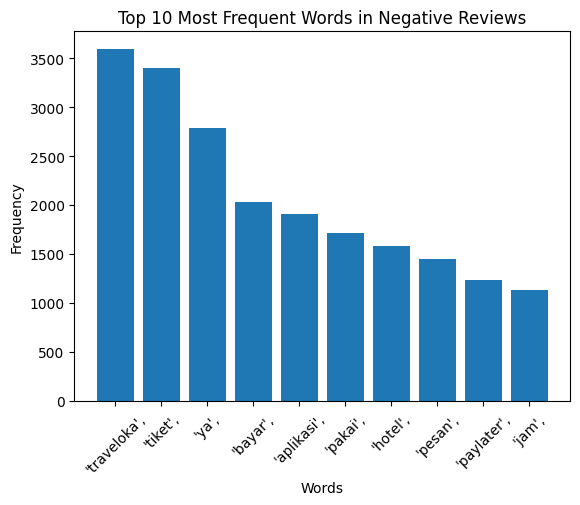

In [ ]:
negative_reviews = df[df['Sentiment'] == 'Negative']

from collections import Counter
import matplotlib.pyplot as plt

# Combine all negative reviews into a single string
text = " ".join(df[df['Sentiment'] == 'Negative']['stemming'].fillna("").astype(str))

# Tokenize and count word frequencies
tokens = text.split()
word_counts = Counter(tokens)

# Get top 10 most frequent words
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

# Plot the results
plt.bar(word, count)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Negative Reviews')
plt.xticks(rotation=45)
plt.show()


Customer feedback indicates a high level of dissatisfaction with the PayLater payment option, whether used for ticket bookings or hotel reservations. The dissatisfaction may be attributed to issues related to time, with possible root causes including the need for clearer communication regarding rescheduling timelines and the limitations on the PayLater service. Further investigation is required to identify and address these specific concerns effectively.

### **Neutral Reviews Insights**

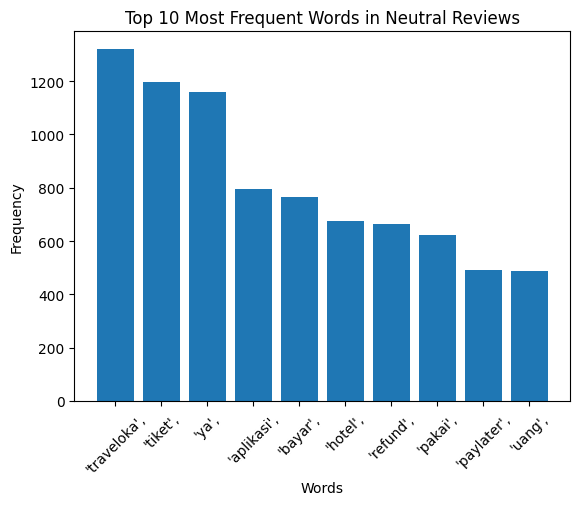

In [ ]:
neutral_reviews = df[df['Sentiment'] == 'Neutral']


from collections import Counter
import matplotlib.pyplot as plt

# Combine all negative reviews into a single string
text = " ".join(neutral_reviews[neutral_reviews['Rating'] == 1]['stemming'].fillna("").astype(str))

# Tokenize and count word frequencies
tokens = text.split()
word_counts = Counter(tokens)

# Get top 10 most frequent words
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

# Plot the results
plt.bar(word, count)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Neutral Reviews')
plt.xticks(rotation=45)
plt.show()


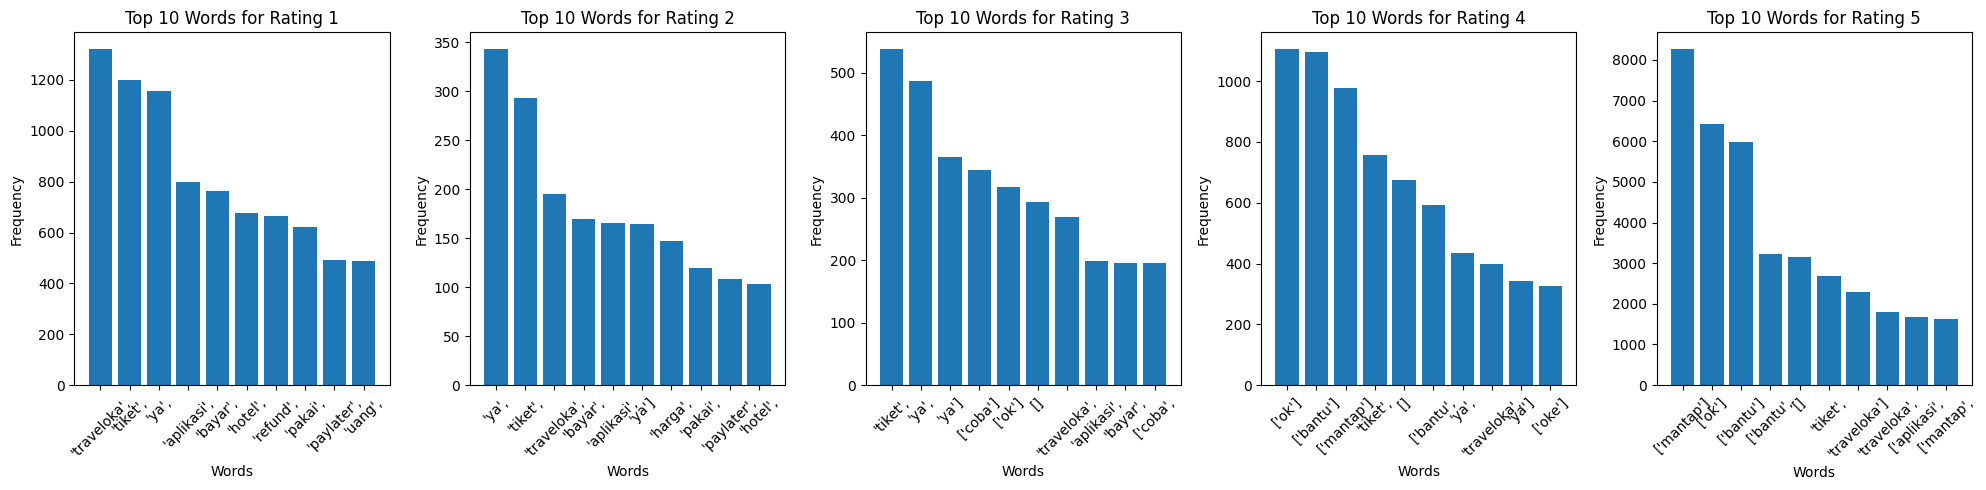

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Define the range for ratings
ratings = [1, 2, 3, 4, 5]

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Iterate over each rating to create a subplot for each
for i, rating in enumerate(ratings):
    # Filter neutral reviews for the current rating
    text = " ".join(neutral_reviews[neutral_reviews['Rating'] == rating]['stemming'].fillna("").astype(str))

    # Tokenize and count word frequencies
    tokens = text.split()
    word_counts = Counter(tokens)

    # Get top 10 most frequent words
    top_words = word_counts.most_common(10)
    word, count = zip(*top_words)

    # Plot the results in the corresponding subplot
    axes[i].bar(word, count)
    axes[i].set_xlabel('Words')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Top 10 Words for Rating {rating}')
    axes[i].tick_params(axis='x', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()



Based on the sentiment analysis, reviews from customers with ratings of 4 and 5 stars indicate that the application meets their expectations and effectively fulfills their booking needs. These positive reviews suggest overall satisfaction with the app’s functionality.

However, reviews with 1- and 2-star ratings highlight areas for improvement, particularly related to the refund process, paylater, and pricing. Addressing these concerns could enhance customer satisfaction and contribute to a more positive user experience.

In [ ]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Date' and 'Sentiment' to get the count of each sentiment per day
sentiment_counts = df.groupby([df['Date'].dt.date, 'Sentiment']).size().reset_index(name='count')

# Convert 'Date' back to datetime if necessary
sentiment_counts['Date'] = pd.to_datetime(sentiment_counts['Date'])


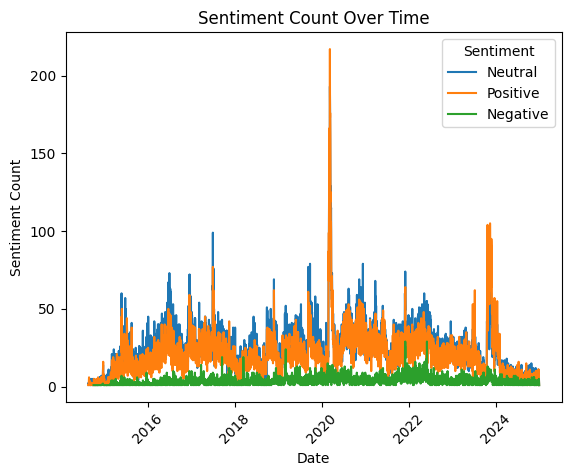

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the line plot for sentiment counts over time
sns.lineplot(data=sentiment_counts, x='Date', y='count', hue='Sentiment')

# Display the plot with appropriate labels
plt.title('Sentiment Count Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()


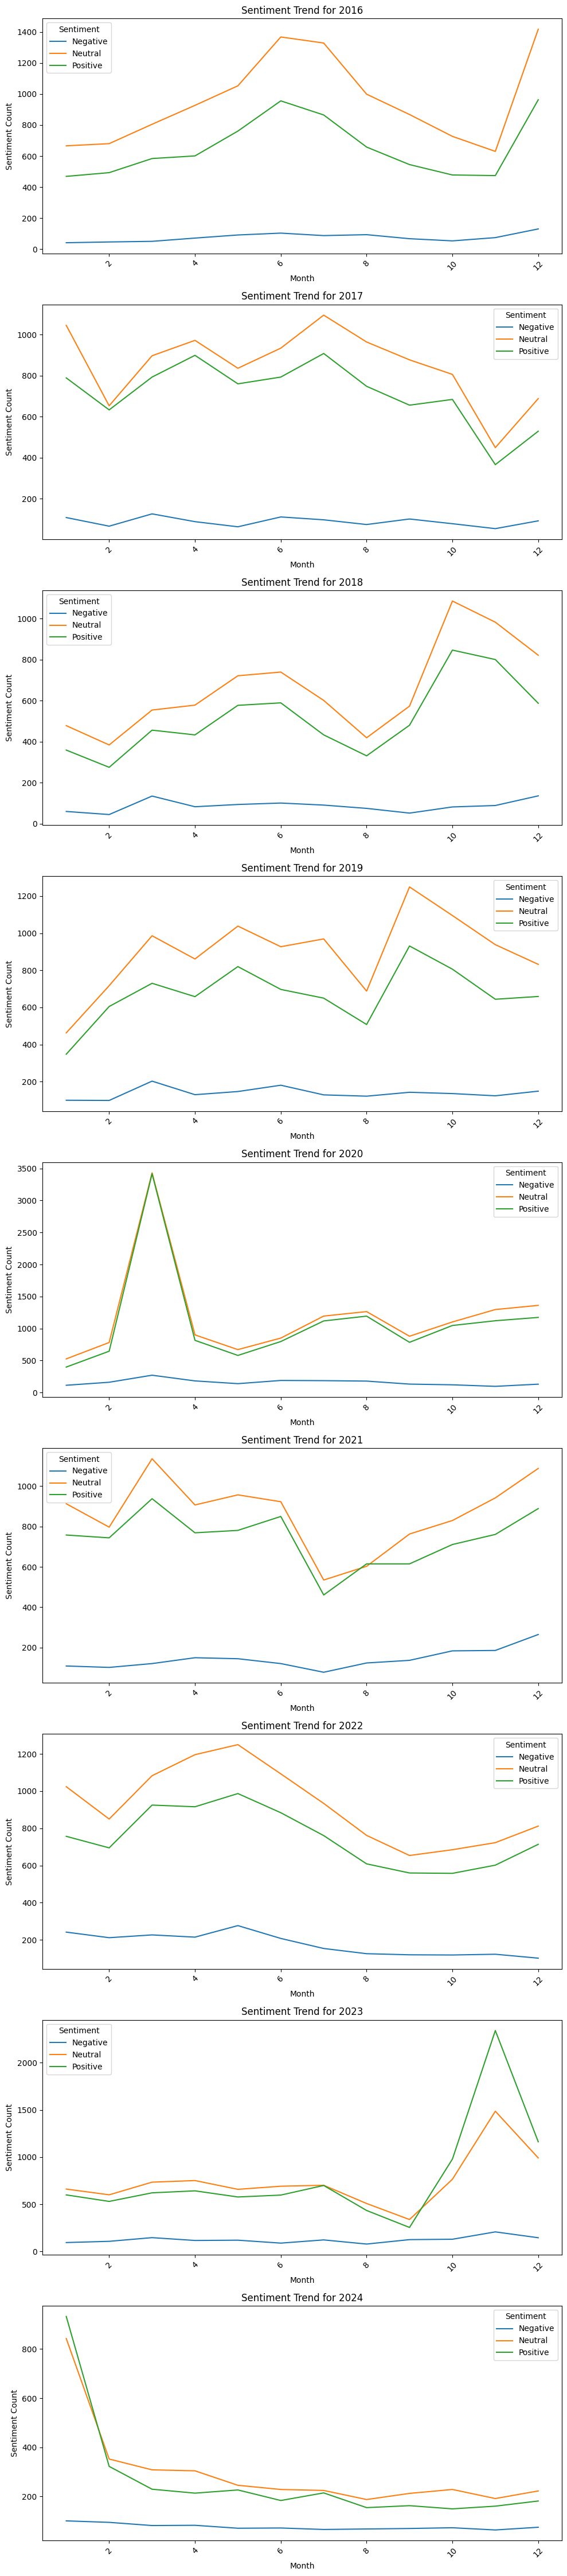

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data from 2016 to 2024
df_filtered = df[(df['Year'] >= 2016) & (df['Year'] <= 2024)]

# Group by year, month, and sentiment and count occurrences
sentiment_counts = df_filtered.groupby(['Year', 'Month', 'Sentiment']).size().reset_index(name='count')

# Ensure 'count' is numeric
sentiment_counts['count'] = pd.to_numeric(sentiment_counts['count'], errors='coerce')

# Get unique years in the data
years = sentiment_counts['Year'].unique()

# Set up the plot with subplots (one for each year)
fig, axes = plt.subplots(len(years), 1, figsize=(10, 5 * len(years)))

# Loop through each year and plot
for i, year in enumerate(years):
    # Filter data for the current year
    year_data = sentiment_counts[sentiment_counts['Year'] == year]

    # Plot the data
    sns.lineplot(ax=axes[i], data=year_data, x='Month', y='count', hue='Sentiment')

    # Set the title and labels
    axes[i].set_title(f'Sentiment Trend for {year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Sentiment Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()


Based on the sentiment analysis from 2016 to 2024, it was observed that the negative sentiment has remained stable throughout the period. However, in early 2024, there was a significant drop in positive sentiment, which has shown minimal recovery since then. This trend suggests a potential shift in customer perceptions that warrants further investigation to understand the underlying factors contributing to this decline.

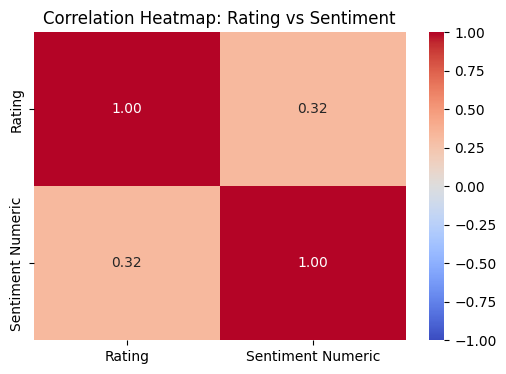

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map sentiments to numerical values (e.g., 'Positive' -> 1, 'Neutral' -> 0, 'Negative' -> -1)
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['Sentiment Numeric'] = df['Sentiment'].map(sentiment_mapping)

# Compute the correlation matrix between Rating and Sentiment Numeric
correlation_matrix = df[['Rating', 'Sentiment Numeric']].corr()

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Heatmap: Rating vs Sentiment')

# Show the plot
plt.show()


There's slightly correlation between rating and sentiment but not significant. Showing, 5 stars rating does not guarantee the positive sentiment